In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv("lab_test.csv")

# Data Analyse

In [4]:
data.columns

Index(['Patient ID ', ' Patient Age', ' Gender ', ' City ', ' Test Name ',
       ' Test Date ', ' Sample Type ', ' Result Value ', ' Unit ',
       ' Normal Range ', ' Test Status ', ' Lab Technician ',
       ' Report Delay (hrs)', ' Machine ID ', ' Re-Test Required ', ' Cost ₹ ',
       ' Insurance Covered ', ' Doctor Remarks'],
      dtype='object')

**Columns names are invalid and contain white spaces

In [5]:
data.shape

(20, 18)

** has 20 rows and 18 columns

In [6]:
data.head()

,Patient ID,Patient Age,Gender,City,Test Name,Test Date,Sample Type,Result Value,Unit,Normal Range,Test Status,Lab Technician,Report Delay (hrs),Machine ID,Re-Test Required,Cost ₹,Insurance Covered,Doctor Remarks
0,P_001,45,Male,Mumbai,HbA1c,2024-01-12,Blood,8.9,%,4.0-5.6,Abnormal,Tech_12,NaN,MCH_09,Yes,1200,Yes,diabetic range
1,P_002,32,Female,Pune,CBC,12/01/2024,Blood,,g/dL,12-16,Pending,Tech_07,18,MCH_03,No,450,No,
2,P_003,67,Male,Delhi,Lipid Profile,2024-01-13,Blood,312,mg/dL,<200,Abnormal,Tech_02,,MCH_01,,2200,Yes,extremely high
3,P_004,29,Female,Bengaluru,Thyroid (TSH),2024-01-13,Blood,0.12,µIU/mL,0.4-4.0,Abnormal,Tech_09,9,MCH_07,Yes,800,No,possible hyper
4,P_005,54,Male,Mumbai,CBC,2024-01-14,Blood,11.2,g/dL,12-16,,Tech_03,5,MCH_03,No,500,Yes,mild anemia


Patient ID -- unique identifier                             
Patient Age -- age of patient                      
Gender -- gender (male, female)                      
city -- City of patient                      
Test Name -- test a patient had                      
Test Date -- when test performed                      
Sample Type -- what sample taken                      
Result Value -- Result of Test (only value)                      
unit -- Unit of the value                      
Normal rane -- common range should be for that test                   
lab Technician -- techician id                      
report delay -- after test, in which hrs report is given              
machine id                      
retest required -- yes or no                      
cost -- cost for the test                      
insurance covered  -- yes or no                      
doctor remark -- doctors description                      

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient ID           20 non-null     object
 1    Patient Age         20 non-null     int64 
 2    Gender              20 non-null     object
 3    City                18 non-null     object
 4    Test Name           20 non-null     object
 5    Test Date           20 non-null     object
 6    Sample Type         20 non-null     object
 7    Result Value        20 non-null     object
 8    Unit                19 non-null     object
 9    Normal Range        18 non-null     object
 10   Test Status         19 non-null     object
 11   Lab Technician      20 non-null     object
 12   Report Delay (hrs)  18 non-null     object
 13   Machine ID          20 non-null     object
 14   Re-Test Required    20 non-null     object
 15   Cost ₹              20 non-null     int64 
 16   Insurance

- data contain both categorical and numerical data
- result value, report delay should be float
- test date should be in datetime form

In [8]:
data.describe()

,Patient Age,Cost ₹
count,20.000000,20.000000
mean,46.450000,1005.000000
std,16.378661,643.162417
min,23.000000,300.000000
25%,33.500000,487.500000
50%,44.500000,800.000000
75%,57.500000,1300.000000
max,81.000000,2200.000000


# Data Cleaning

### Data column name clean

In [9]:
data.columns

Index(['Patient ID ', ' Patient Age', ' Gender ', ' City ', ' Test Name ',
       ' Test Date ', ' Sample Type ', ' Result Value ', ' Unit ',
       ' Normal Range ', ' Test Status ', ' Lab Technician ',
       ' Report Delay (hrs)', ' Machine ID ', ' Re-Test Required ', ' Cost ₹ ',
       ' Insurance Covered ', ' Doctor Remarks'],
      dtype='object')

In [10]:
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()
data.columns

Index(['patient_id', 'patient_age', 'gender', 'city', 'test_name', 'test_date',
       'sample_type', 'result_value', 'unit', 'normal_range', 'test_status',
       'lab_technician', 'report_delay_(hrs)', 'machine_id',
       're-test_required', 'cost_₹', 'insurance_covered', 'doctor_remarks'],
      dtype='object')

In [11]:
data.rename(columns={
    'report_delay_(hrs)':'report_delay',
    'cost_₹' : 'cost'
}, inplace=True)

data.columns

Index(['patient_id', 'patient_age', 'gender', 'city', 'test_name', 'test_date',
       'sample_type', 'result_value', 'unit', 'normal_range', 'test_status',
       'lab_technician', 'report_delay', 'machine_id', 're-test_required',
       'cost', 'insurance_covered', 'doctor_remarks'],
      dtype='object')

** data columns has no extra spaces now, and names are too valid

### data value clean

In [12]:
for col in data.select_dtypes(include='object'):
    if not data[col].equals(data[col].str.strip()):
        print(col)

gender
city
test_name
test_date
sample_type
result_value
unit
normal_range
test_status
lab_technician
report_delay
machine_id
re-test_required
insurance_covered
doctor_remarks


**most coolumn values has extra white spaces

In [13]:
for col in data.select_dtypes(include='object'):
    data[col] = data[col].str.strip()

In [14]:
for col in data.select_dtypes(include='object'):
    if not data[col].equals(data[col].str.strip()):
        print(col)

**data values are now clean

### data type change

In [15]:
data.dtypes

patient_id           object
patient_age           int64
gender               object
city                 object
test_name            object
test_date            object
sample_type          object
result_value         object
unit                 object
normal_range         object
test_status          object
lab_technician       object
report_delay         object
machine_id           object
re-test_required     object
cost                  int64
insurance_covered    object
doctor_remarks       object
dtype: object

- test_date -- datetime
- result_value -- numeric
- report_delay -- numeric

In [16]:
# report_delay
data['report_delay'] = pd.to_numeric(data['report_delay'], errors='coerce')

# result_value
data['result_value'] = pd.to_numeric(data['result_value'], errors='coerce')


- to convert test_value to date_time, noticed 3 types of date form are present
- yyyy-mm-dd   valid
- yyyy/mm/dd   invalid - replace / to -
- dd/mm/yyyy   invalid - will be Nan

In [17]:
# Replace - with / for uniformity
data['test_date'] = data['test_date'].str.replace('-', '/')

# Then convert
data['test_date'] = pd.to_datetime(data['test_date'], errors='coerce')


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   patient_id         20 non-null     object        
 1   patient_age        20 non-null     int64         
 2   gender             20 non-null     object        
 3   city               18 non-null     object        
 4   test_name          20 non-null     object        
 5   test_date          14 non-null     datetime64[ns]
 6   sample_type        20 non-null     object        
 7   result_value       17 non-null     float64       
 8   unit               19 non-null     object        
 9   normal_range       18 non-null     object        
 10  test_status        19 non-null     object        
 11  lab_technician     20 non-null     object        
 12  report_delay       17 non-null     float64       
 13  machine_id         20 non-null     object        
 14  re-test_requ

In [19]:
data.head()

,patient_id,patient_age,gender,city,test_name,test_date,sample_type,result_value,unit,normal_range,test_status,lab_technician,report_delay,machine_id,re-test_required,cost,insurance_covered,doctor_remarks
0,P_001,45,Male,Mumbai,HbA1c,2024-01-12,Blood,8.90,%,4.0-5.6,Abnormal,Tech_12,NaN,MCH_09,Yes,1200,Yes,diabetic range
1,P_002,32,Female,Pune,CBC,NaT,Blood,NaN,g/dL,12-16,Pending,Tech_07,18.0,MCH_03,No,450,No,
2,P_003,67,Male,Delhi,Lipid Profile,2024-01-13,Blood,312.00,mg/dL,<200,Abnormal,Tech_02,NaN,MCH_01,,2200,Yes,extremely high
3,P_004,29,Female,Bengaluru,Thyroid (TSH),2024-01-13,Blood,0.12,µIU/mL,0.4-4.0,Abnormal,Tech_09,9.0,MCH_07,Yes,800,No,possible hyper
4,P_005,54,Male,Mumbai,CBC,2024-01-14,Blood,11.20,g/dL,12-16,,Tech_03,5.0,MCH_03,No,500,Yes,mild anemia


### Null Cleaning

In [20]:
data.replace('', None, inplace=True)    # before checking nulls , replace empty strings to None

In [21]:
data.isnull().sum()

patient_id           0
patient_age          0
gender               0
city                 4
test_name            0
test_date            6
sample_type          4
result_value         3
unit                 3
normal_range         4
test_status          2
lab_technician       0
report_delay         3
machine_id           0
re-test_required     2
cost                 0
insurance_covered    1
doctor_remarks       5
dtype: int64

- city, sample_type, test_status -- fill 'unknown'   (done)
- test_date  -- fill median (small dataset)    (done)
- result_value, unit, normal_range -- configured from test_name and if still NaN  -- then N\A
- report delay -- mean  (done)
- re-test required, insurance_covered -- mode or 'no' (done)
- doctor remark - N/A (done)

In [22]:
# city sample_type, test_status, doctor remark
data['city'] = data['city'].fillna('Unknown')
data['sample_type'] = data['sample_type'].fillna('Unknown')
data['test_status'] = data['test_status'].fillna('Unknown')
data['doctor_remarks'] = data['doctor_remarks'].fillna('N/A')
data['unit'] = data['unit'].fillna('N/A')
data['normal_range'] = data['normal_range'].fillna('N/A')

** from city, sample_type and test_status nulls are removed

In [23]:
# test_date
median_test_date = data['test_date'].median()
median_test_date

Timestamp('2024-01-16 00:00:00')

In [24]:
data['test_date'] = data['test_date'].fillna(median_test_date)

**test_date nulls filled with median

In [25]:
# report_delay
delay_mean = data['report_delay'].mean().round()
delay_mean

np.float64(9.0)

In [26]:
data['report_delay'] = data['report_delay'].fillna(delay_mean)

** report_delay nulls filled with mean

In [27]:
# retest_required and insurance_covered
retest_mode = data['re-test_required'].mode()[0]
retest_mode

'No'

In [28]:
data['re-test_required'] = data['re-test_required'].fillna(retest_mode)

In [29]:
insurance_mode = data['insurance_covered'].mode()[0]
insurance_mode

'Yes'

In [30]:
data['insurance_covered'] = data['insurance_covered'].fillna(insurance_mode)

**re-test_required nulls filled with No   and insurance_covered nulls filled with yes

In [31]:
value_mean = data['result_value'].mean()
value_mean

np.float64(59.31294117647059)

In [32]:

data['result_value'] = data['result_value'].fillna(value_mean)

In [33]:
data.isnull().sum()

patient_id           0
patient_age          0
gender               0
city                 0
test_name            0
test_date            0
sample_type          0
result_value         0
unit                 0
normal_range         0
test_status          0
lab_technician       0
report_delay         0
machine_id           0
re-test_required     0
cost                 0
insurance_covered    0
doctor_remarks       0
dtype: int64

### Duplicate check

In [34]:
data.duplicated().sum()

np.int64(0)

**No duplicates are there

### Outliers detection

In [35]:
data.dtypes

patient_id                   object
patient_age                   int64
gender                       object
city                         object
test_name                    object
test_date            datetime64[ns]
sample_type                  object
result_value                float64
unit                         object
normal_range                 object
test_status                  object
lab_technician               object
report_delay                float64
machine_id                   object
re-test_required             object
cost                          int64
insurance_covered            object
doctor_remarks               object
dtype: object

**Only numerical data can have outliers

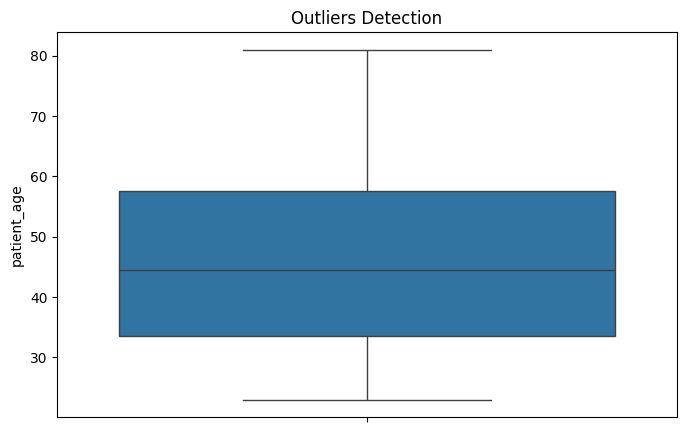

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data['patient_age'])

plt.title("Outliers Detection")
plt.xticks(rotation=30)
plt.show()

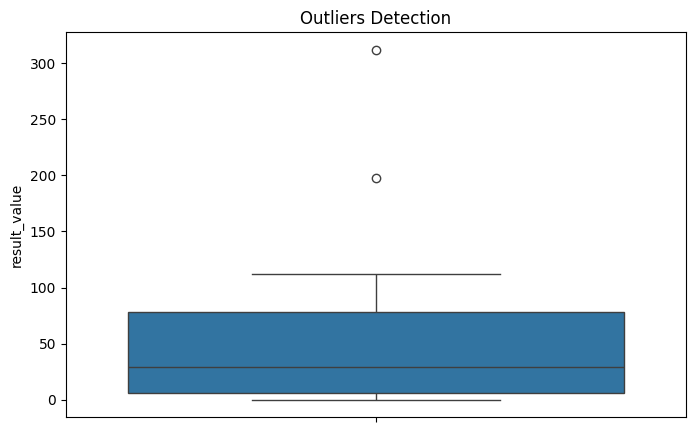

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data['result_value'])

plt.title("Outliers Detection")
plt.xticks(rotation=30)
plt.show()

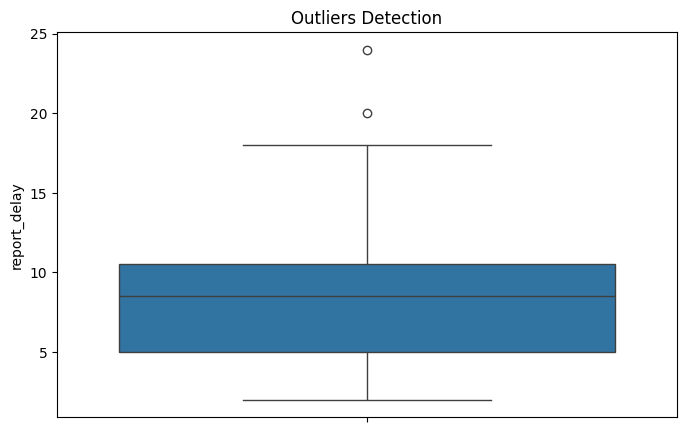

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data['report_delay'])

plt.title("Outliers Detection")
plt.xticks(rotation=30)
plt.show()

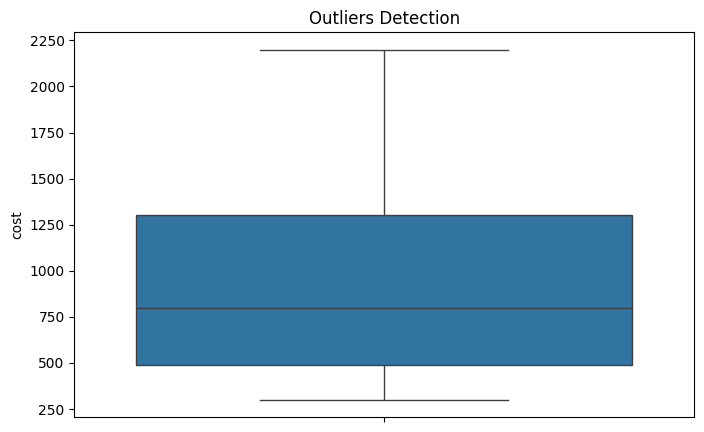

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data['cost'])

plt.title("Outliers Detection")
plt.xticks(rotation=30)
plt.show()

### Encoding

In [42]:
data.dtypes

patient_id                   object
patient_age                   int64
gender                       object
city                         object
test_name                    object
test_date            datetime64[ns]
sample_type                  object
result_value                float64
unit                         object
normal_range                 object
test_status                  object
lab_technician               object
report_delay                float64
machine_id                   object
re-test_required             object
cost                          int64
insurance_covered            object
doctor_remarks               object
dtype: object